# Christenings Data Analysis

This notebook analyzes christenings data from the Bills of Mortality, examining gender patterns, temporal trends, and demographic insights from birth records.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Data directory
data_dir = Path('../data')

## Data Loading and Overview

In [2]:
# Load both christenings data files
gender_file = data_dir / 'christenings_by_gender.csv'
parish_file = data_dir / 'christenings_by_parish.csv'

# Load gender christenings data
if gender_file.exists():
    christenings_gender = pd.read_csv(gender_file)
    print(f"✓ Loaded gender christenings data: {christenings_gender.shape}")
else:
    print("❌ Gender christenings data file not found")
    christenings_gender = pd.DataFrame()

# Load parish christenings data  
if parish_file.exists():
    christenings_parish = pd.read_csv(parish_file)
    print(f"✓ Loaded parish christenings data: {christenings_parish.shape}")
else:
    print("❌ Parish christenings data file not found")
    christenings_parish = pd.DataFrame()

# Dataset overview
print("\n📋 Dataset Overview:")
if not christenings_gender.empty:
    print(f"   • Gender data: {len(christenings_gender):,} records")
    print(f"     - Date range: {christenings_gender['year'].min()}-{christenings_gender['year'].max()}")
    print(f"     - Christening types: {christenings_gender['christening'].nunique()}")
    
if not christenings_parish.empty:
    print(f"   • Parish data: {len(christenings_parish):,} records")
    print(f"     - Date range: {christenings_parish['year'].min()}-{christenings_parish['year'].max()}")
    print(f"     - Parish groups: {christenings_parish['parish_name'].nunique()}")
    print(f"     - Sources: {christenings_parish['source'].nunique()}")

# Display sample records
if not christenings_gender.empty:
    print("\n📄 Sample Gender Records:")
    display(christenings_gender.head(10))
    
if not christenings_parish.empty:
    print("\n📄 Sample Parish Records:")
    display(christenings_parish[['year', 'week', 'parish_name', 'count', 'source']].head(10))

✓ Loaded gender christenings data: (60, 9)
✓ Loaded parish christenings data: (16898, 17)

📋 Dataset Overview:
   • Gender data: 60 records
     - Date range: 1700-1701
     - Christening types: 3
   • Parish data: 16,898 records
     - Date range: 1665-1752
     - Parish groups: 8
     - Sources: 14

📄 Sample Gender Records:


,year,week_number,unique_identifier,start_day,start_month,end_day,end_month,christening,count
0,1700,1,Laxton-1700-01-verso,17,December,24,December,Christened (Female),106
1,1700,1,Laxton-1700-01-verso,17,December,24,December,Christened (In All),242
2,1700,1,Laxton-1700-01-verso,17,December,24,December,Christened (Male),136
3,1700,2,Laxton-1700-02-verso,24,December,31,December,Christened (Female),139
4,1700,2,Laxton-1700-02-verso,24,December,31,December,Christened (In All),314
5,1700,2,Laxton-1700-02-verso,24,December,31,December,Christened (Male),175
6,1700,3,Laxton-1700-03-verso,31,December,7,January,Christened (Female),158
7,1700,3,Laxton-1700-03-verso,31,December,7,January,Christened (In All),327
8,1700,3,Laxton-1700-03-verso,31,December,7,January,Christened (Male),169
9,1700,4,Laxton-1700-04-verso,7,January,14,January,Christened (Female),120



📄 Sample Parish Records:


,year,week,parish_name,count,source
0,1701,14,Christened in the 97 parishes within the walls,23,2023-07-18-Laxton-old-weeklybills-parishes.csv
1,1701,14,Christened in the parishes without the walls,97,2023-07-18-Laxton-old-weeklybills-parishes.csv
2,1701,14,Christened in the out-Parishes in Middlesex an...,112,2023-07-18-Laxton-old-weeklybills-parishes.csv
3,1701,14,Christened in the Parishes and Liberties of We...,78,2023-07-18-Laxton-old-weeklybills-parishes.csv
4,1701,15,Christened in the 97 parishes within the walls,38,2023-07-18-Laxton-old-weeklybills-parishes.csv
5,1701,15,Christened in the parishes without the walls,96,2023-07-18-Laxton-old-weeklybills-parishes.csv
6,1701,15,Christened in the out-Parishes in Middlesex an...,117,2023-07-18-Laxton-old-weeklybills-parishes.csv
7,1701,15,Christened in the Parishes and Liberties of We...,64,2023-07-18-Laxton-old-weeklybills-parishes.csv
8,1701,16,Christened in the 97 parishes within the walls,35,2023-07-18-Laxton-old-weeklybills-parishes.csv
9,1701,16,Christened in the parishes without the walls,95,2023-07-18-Laxton-old-weeklybills-parishes.csv


## Christenings Types Distribution

Gender Christening Types Distribution:
   • Christened (Female): 20 records (33.3%)
   • Christened (In All): 20 records (33.3%)
   • Christened (Male): 20 records (33.3%)

Total Christenings by Type:
   • Christened (Female): 2,889 christenings
   • Christened (In All): 6,033 christenings
   • Christened (Male): 3,144 christenings


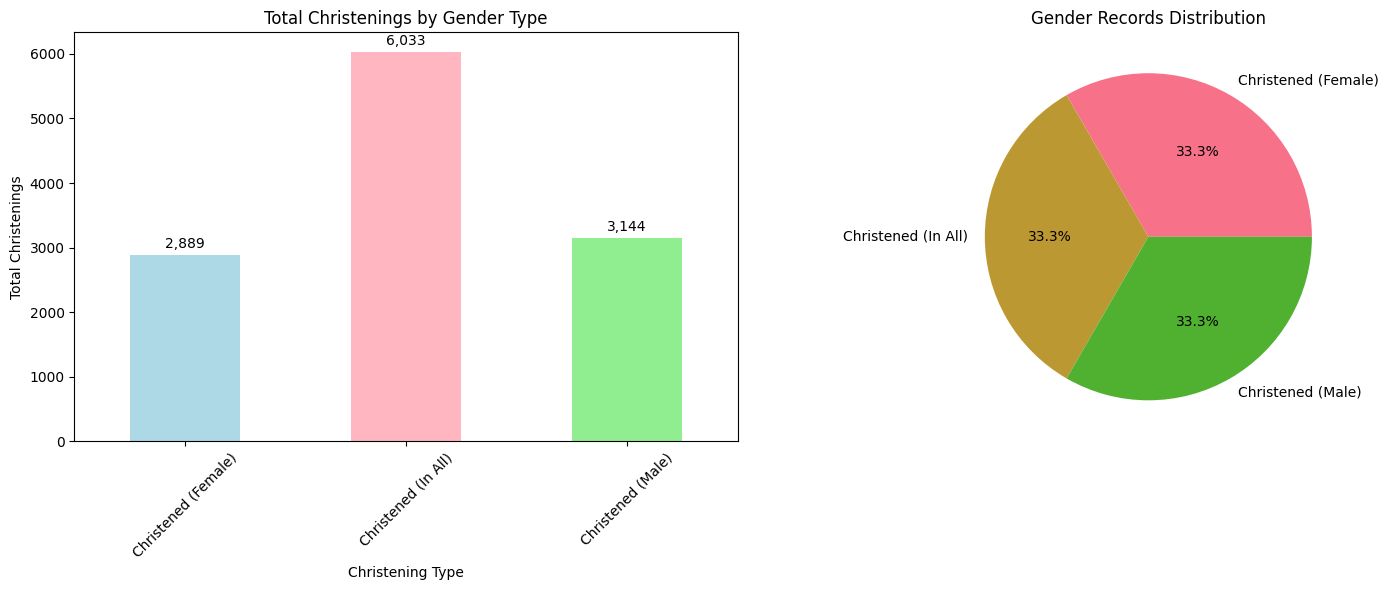


🏘️ Parish Christenings Analysis:
Parish Groups (Total Christenings):
   • Christened in the out-Parishes in Middlesex and Surrey: 1,116,140
   • Christened in the parishes without the walls: 985,596
   • Christened in the Parishes and Liberties of Westminster: 503,336
   • Christened in the 97 parishes within the walls: 360,826
   • Christened in the Parishes in the City and Liberties of Westminster: 189,843
   • Christened In The 16 Parishes Without The Walls: 67,894
   • Christened In The 13 Out Parishes In Middlesex And Surrey: 63,892
   • Christened In The 5 Parishes In The City And Liberties Of Westminster: 37,720


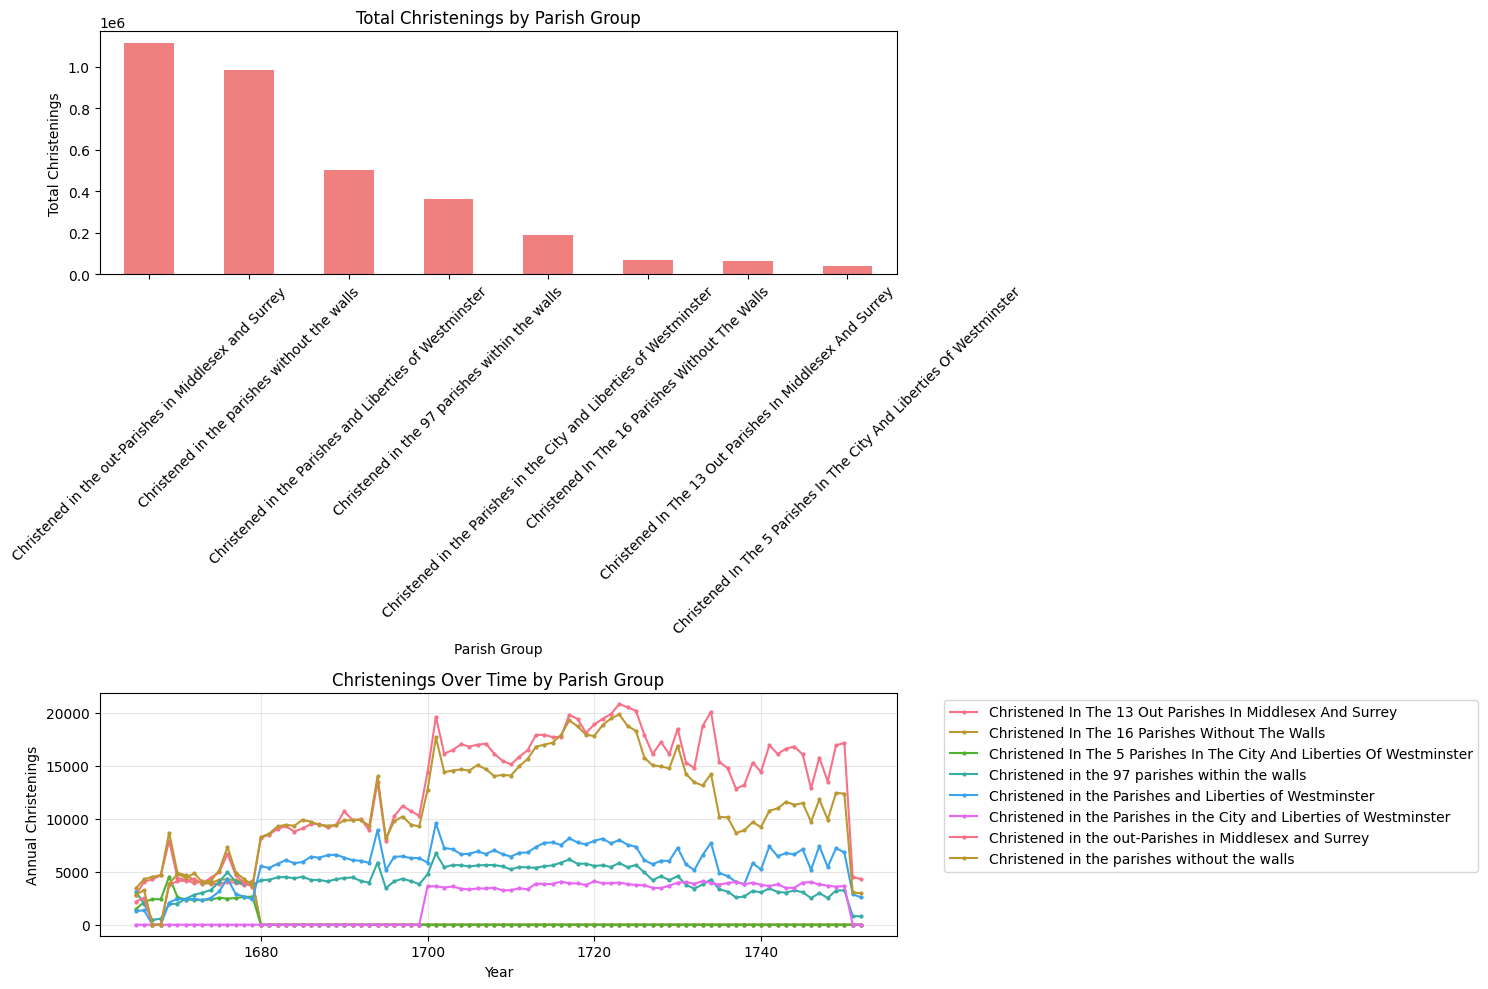

In [3]:
# Gender Christenings Analysis
if not christenings_gender.empty:
    # Christening types distribution
    gender_type_counts = christenings_gender['christening'].value_counts()
    
    print("Gender Christening Types Distribution:")
    for christening_type, count in gender_type_counts.items():
        percentage = (count / len(christenings_gender)) * 100
        print(f"   • {christening_type}: {count:,} records ({percentage:.1f}%)")
    
    # Total counts by type
    gender_totals = christenings_gender.groupby('christening')['count'].sum()
    print(f"\nTotal Christenings by Type:")
    for christening_type, total in gender_totals.items():
        print(f"   • {christening_type}: {total:,} christenings")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar chart of totals
    gender_totals.plot(kind='bar', ax=ax1, color=['lightblue', 'lightpink', 'lightgreen'])
    ax1.set_title('Total Christenings by Gender Type')
    ax1.set_xlabel('Christening Type')
    ax1.set_ylabel('Total Christenings')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(gender_totals.values):
        ax1.text(i, v + max(gender_totals.values) * 0.01, f'{v:,}', 
                ha='center', va='bottom')
    
    # Record counts pie chart
    gender_type_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
    ax2.set_title('Gender Records Distribution')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()

# Parish Christenings Analysis  
if not christenings_parish.empty:
    print(f"\n🏘️ Parish Christenings Analysis:")
    
    # Parish group distribution
    parish_totals = christenings_parish.groupby('parish_name')['count'].sum().sort_values(ascending=False)
    
    print(f"Parish Groups (Total Christenings):")
    for parish, total in parish_totals.items():
        print(f"   • {parish}: {total:,}")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Parish totals bar chart
    parish_totals.plot(kind='bar', ax=ax1, color='lightcoral')
    ax1.set_title('Total Christenings by Parish Group')
    ax1.set_xlabel('Parish Group')
    ax1.set_ylabel('Total Christenings')
    ax1.tick_params(axis='x', rotation=45)
    
    # Time series by parish group
    parish_time = christenings_parish.pivot_table(
        index='year', 
        columns='parish_name', 
        values='count', 
        aggfunc='sum',
        fill_value=0
    )
    
    parish_time.plot(ax=ax2, marker='o', markersize=2)
    ax2.set_title('Christenings Over Time by Parish Group')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Annual Christenings')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## Gender Analysis

👨‍👩‍👧‍👦 Gender Distribution:
   • Christened (Female): 2,889 (47.9%)
   • Christened (Male): 3,144 (52.1%)
   • Gender Ratio: 108.8 males per 100 females


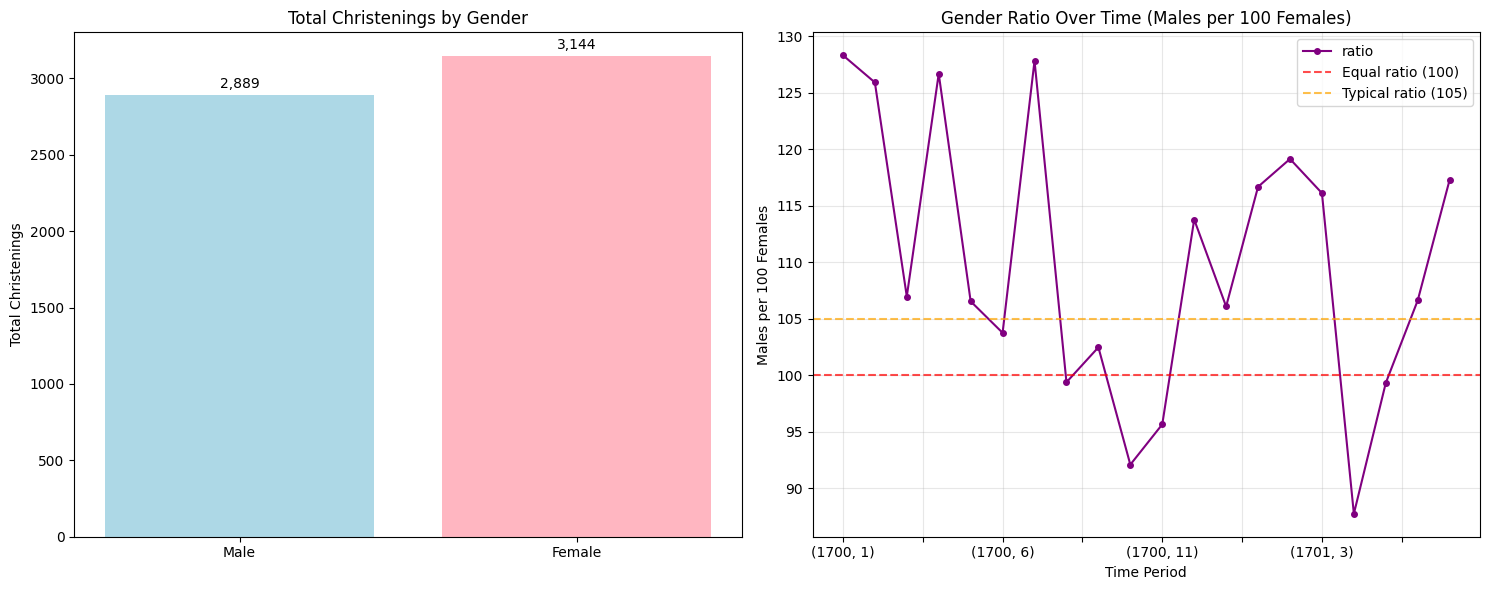

In [4]:
# Gender Ratio Analysis
if not christenings_gender.empty:
    # Filter to male and female records only
    gender_only = christenings_gender[
        christenings_gender['christening'].isin(['Christened (Male)', 'Christened (Female)'])
    ].copy()
    
    if not gender_only.empty:
        # Total christenings by gender
        gender_totals = gender_only.groupby('christening')['count'].sum()
        
        print("👨‍👩‍👧‍👦 Gender Distribution:")
        total_gendered = gender_totals.sum()
        for gender, total in gender_totals.items():
            percentage = (total / total_gendered) * 100
            print(f"   • {gender}: {total:,} ({percentage:.1f}%)")
        
        # Calculate gender ratio (male births per 100 female births)
        if 'Christened (Male)' in gender_totals.index and 'Christened (Female)' in gender_totals.index:
            male_total = gender_totals['Christened (Male)']
            female_total = gender_totals['Christened (Female)']
            gender_ratio = (male_total / female_total) * 100
            print(f"   • Gender Ratio: {gender_ratio:.1f} males per 100 females")
        
        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Gender totals bar chart
        gender_labels = ['Male', 'Female']
        colors = ['lightblue', 'lightpink']
        ax1.bar(gender_labels, gender_totals.values, color=colors)
        ax1.set_title('Total Christenings by Gender')
        ax1.set_ylabel('Total Christenings')
        
        # Add value labels on bars
        for i, v in enumerate(gender_totals.values):
            ax1.text(i, v + max(gender_totals.values) * 0.01, f'{v:,}', 
                    ha='center', va='bottom')
        
        # Gender ratio over time
        weekly_gender = gender_only.pivot_table(
            index=['year', 'week_number'], 
            columns='christening', 
            values='count', 
            aggfunc='sum',
            fill_value=0
        )
        
        if 'Christened (Male)' in weekly_gender.columns and 'Christened (Female)' in weekly_gender.columns:
            # Calculate weekly gender ratios (avoid division by zero)
            weekly_gender['ratio'] = np.where(
                weekly_gender['Christened (Female)'] > 0,
                (weekly_gender['Christened (Male)'] / weekly_gender['Christened (Female)']) * 100,
                np.nan
            )
            
            # Plot weekly gender ratio
            weekly_gender['ratio'].dropna().plot(ax=ax2, marker='o', markersize=4, color='purple')
            ax2.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Equal ratio (100)')
            ax2.axhline(y=105, color='orange', linestyle='--', alpha=0.7, label='Typical ratio (105)')
            ax2.set_title('Gender Ratio Over Time (Males per 100 Females)')
            ax2.set_ylabel('Males per 100 Females')
            ax2.set_xlabel('Time Period')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    else:
        print("ℹ️ No gender-specific christening data found")

## Temporal Analysis

📅 Christenings by Year (All Data):
   • 1665: 17,078 christenings
   • 1666: 19,611 christenings
   • 1667: 11,633 christenings
   • 1668: 12,302 christenings
   • 1669: 32,724 christenings
   • 1670: 25,251 christenings
   • 1671: 24,622 christenings
   • 1672: 24,889 christenings
   • 1673: 23,521 christenings
   • 1674: 24,488 christenings
   • 1675: 27,847 christenings
   • 1676: 34,059 christenings
   • 1677: 27,142 christenings
   • 1678: 25,158 christenings
   • 1679: 24,174 christenings
   • 1680: 26,147 christenings
   • 1681: 26,677 christenings
   • 1682: 28,488 christenings
   • 1683: 29,297 christenings
   • 1684: 28,282 christenings
   • 1685: 29,402 christenings
   • 1686: 29,821 christenings
   • 1687: 29,467 christenings
   • 1688: 29,128 christenings
   • 1689: 29,659 christenings
   • 1690: 31,268 christenings
   • 1691: 30,231 christenings
   • 1692: 30,002 christenings
   • 1693: 28,010 christenings
   • 1694: 42,259 christenings
   • 1695: 24,656 christenings
   •

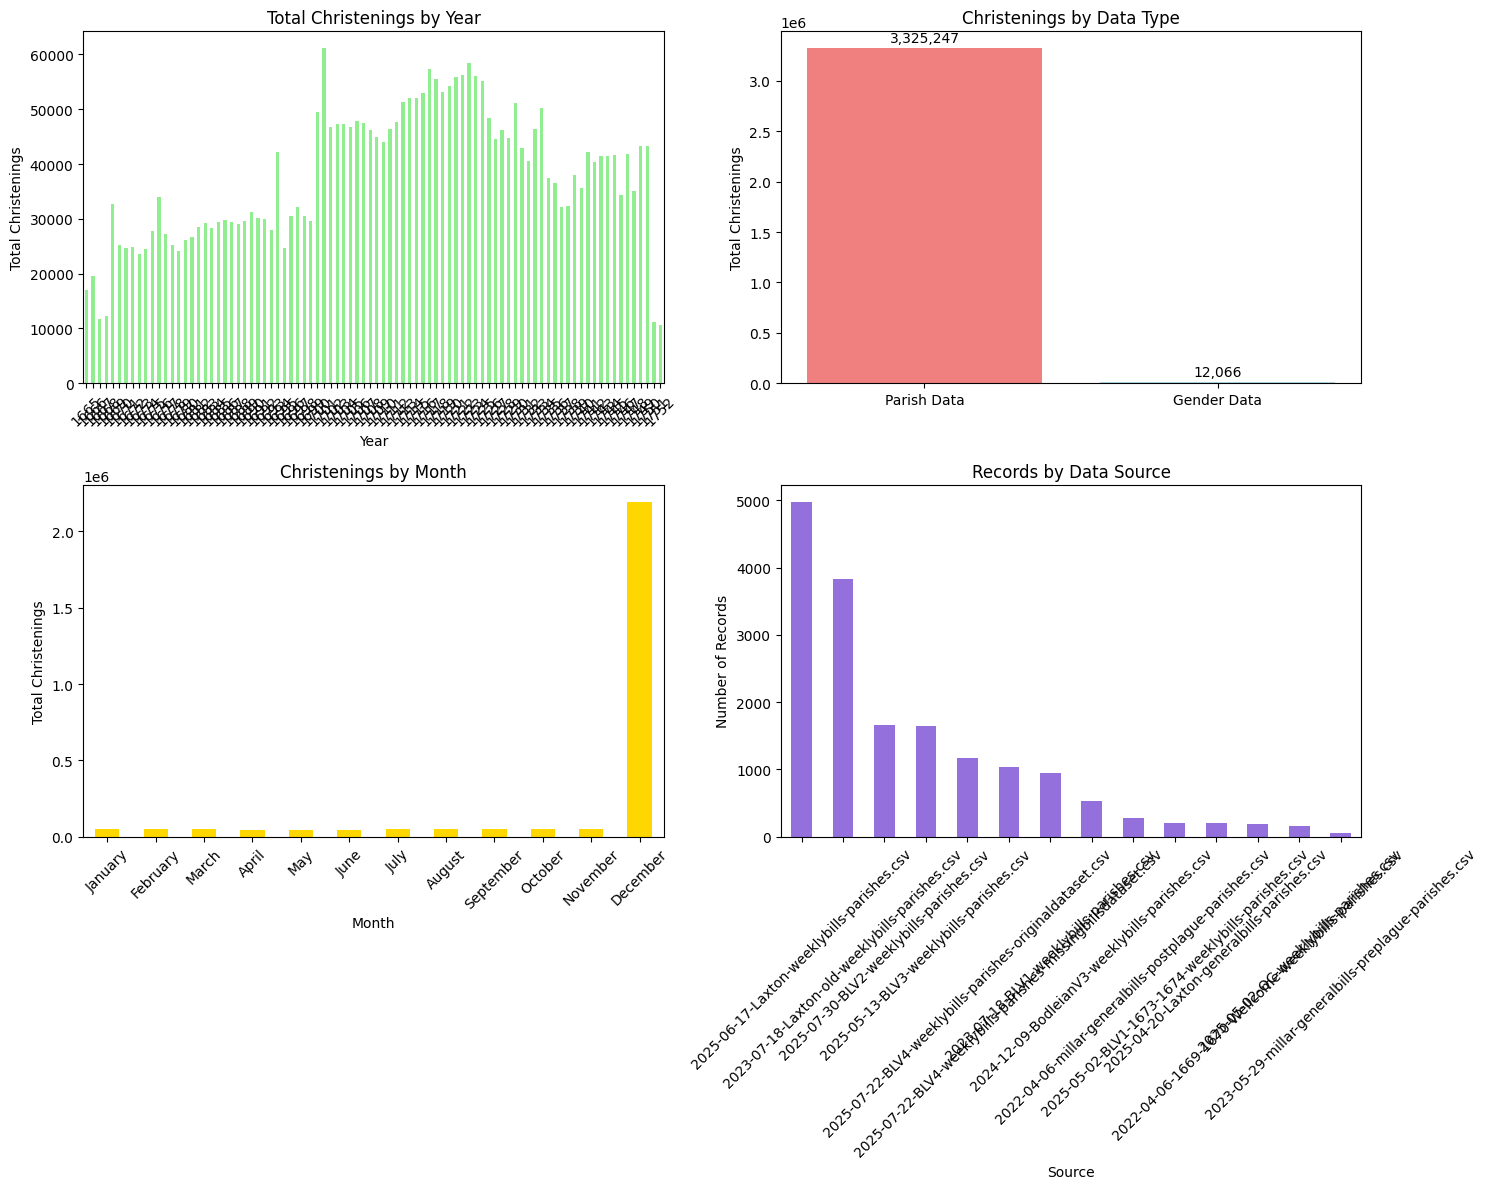


📊 Parish Weekly Patterns:
   • Weeks with data: 54
   • Average per week: 61578.6
   • Peak week: 90 (2,147,733 christenings)
   • Lowest week: 53 (3,290 christenings)


In [5]:
# Temporal Analysis - Combined Data
combined_data = pd.concat([christenings_gender, christenings_parish], ignore_index=True)

if not combined_data.empty:
    # Total christenings by year
    yearly_christenings = combined_data.groupby('year')['count'].sum().sort_index()
    
    print("📅 Christenings by Year (All Data):")
    for year, total in yearly_christenings.items():
        print(f"   • {year}: {total:,} christenings")
    
    # Source analysis
    if 'source' in combined_data.columns:
        source_analysis = combined_data.groupby('source').agg({
            'count': ['count', 'sum'],
            'year': ['min', 'max']
        }).round(1)
        
        print(f"\n📊 Source Analysis:")
        for source in combined_data['source'].unique():
            source_data = combined_data[combined_data['source'] == source]
            records = len(source_data)
            total_christenings = source_data['count'].sum()
            year_range = f"{source_data['year'].min():.0f}-{source_data['year'].max():.0f}"
            print(f"   • {source}: {records:,} records, {total_christenings:,} christenings, {year_range}")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Yearly trends
    yearly_christenings.plot(kind='bar', ax=axes[0,0], color='lightgreen')
    axes[0,0].set_title('Total Christenings by Year')
    axes[0,0].set_xlabel('Year')
    axes[0,0].set_ylabel('Total Christenings')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Parish vs Gender data comparison
    if not christenings_parish.empty and not christenings_gender.empty:
        parish_total = christenings_parish['count'].sum()
        gender_total = christenings_gender['count'].sum()
        
        data_types = ['Parish Data', 'Gender Data']
        totals = [parish_total, gender_total]
        
        axes[0,1].bar(data_types, totals, color=['lightcoral', 'lightblue'])
        axes[0,1].set_title('Christenings by Data Type')
        axes[0,1].set_ylabel('Total Christenings')
        
        # Add value labels
        for i, v in enumerate(totals):
            axes[0,1].text(i, v + max(totals) * 0.01, f'{v:,}', 
                          ha='center', va='bottom')
    
    # Monthly patterns (if available)
    if 'start_month' in combined_data.columns:
        monthly_totals = combined_data.groupby('start_month')['count'].sum()
        month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                      'July', 'August', 'September', 'October', 'November', 'December']
        monthly_totals = monthly_totals.reindex([m for m in month_order if m in monthly_totals.index])
        
        monthly_totals.plot(kind='bar', ax=axes[1,0], color='gold')
        axes[1,0].set_title('Christenings by Month')
        axes[1,0].set_xlabel('Month')
        axes[1,0].set_ylabel('Total Christenings')
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # Records count by source
    if 'source' in combined_data.columns:
        source_counts = combined_data['source'].value_counts()
        source_counts.plot(kind='bar', ax=axes[1,1], color='mediumpurple')
        axes[1,1].set_title('Records by Data Source')
        axes[1,1].set_xlabel('Source')
        axes[1,1].set_ylabel('Number of Records')
        axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Weekly patterns for parish data
    if not christenings_parish.empty and 'week' in christenings_parish.columns:
        weekly_parish = christenings_parish.groupby('week')['count'].sum().sort_index()
        
        print(f"\n📊 Parish Weekly Patterns:")
        print(f"   • Weeks with data: {len(weekly_parish)}")
        print(f"   • Average per week: {weekly_parish.mean():.1f}")
        if len(weekly_parish) > 0:
            print(f"   • Peak week: {weekly_parish.idxmax()} ({weekly_parish.max():,} christenings)")
            print(f"   • Lowest week: {weekly_parish.idxmin()} ({weekly_parish.min():,} christenings)")
else:
    print("❌ No christenings data available for temporal analysis")

## Seasonal Patterns Analysis

🌱 Seasonal Patterns:
   • Spring: 143,238 christenings (5.2%)
   • Summer: 143,902 christenings (5.3%)
   • Autumn: 147,363 christenings (5.4%)
   • Winter: 2,295,977 christenings (84.1%)

📚 Historical Context:
   • Seasonal birth patterns often reflected:
     - Marriage seasons (affecting conception timing)
     - Economic cycles and food availability
     - Religious calendar influences
     - Climate and health conditions


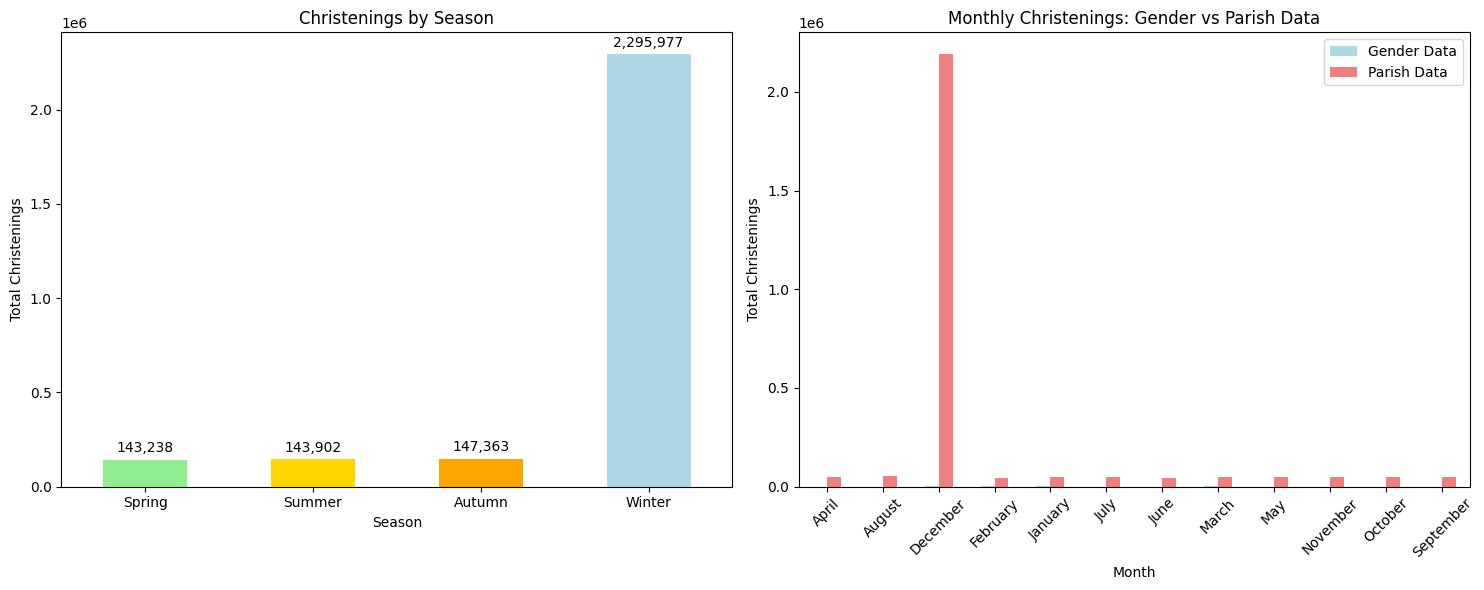

In [6]:
# Seasonal Patterns Analysis
if not combined_data.empty and 'start_month' in combined_data.columns:
    # Define seasons
    season_map = {
        'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
        'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
        'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
        'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
    }
    
    # Add season column
    seasonal_data = combined_data.copy()
    seasonal_data['season'] = seasonal_data['start_month'].map(season_map)
    
    # Seasonal totals
    seasonal_totals = seasonal_data.groupby('season')['count'].sum()
    seasonal_order = ['Spring', 'Summer', 'Autumn', 'Winter']
    seasonal_totals = seasonal_totals.reindex([s for s in seasonal_order if s in seasonal_totals.index])
    
    print("🌱 Seasonal Patterns:")
    total_seasonal = seasonal_totals.sum()
    for season, total in seasonal_totals.items():
        percentage = (total / total_seasonal) * 100
        print(f"   • {season}: {total:,} christenings ({percentage:.1f}%)")
    
    # Historical context
    print("\n📚 Historical Context:")
    print("   • Seasonal birth patterns often reflected:")
    print("     - Marriage seasons (affecting conception timing)")
    print("     - Economic cycles and food availability") 
    print("     - Religious calendar influences")
    print("     - Climate and health conditions")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Seasonal bar chart
    colors = ['lightgreen', 'gold', 'orange', 'lightblue']
    seasonal_totals.plot(kind='bar', ax=ax1, color=colors[:len(seasonal_totals)])
    ax1.set_title('Christenings by Season')
    ax1.set_xlabel('Season')
    ax1.set_ylabel('Total Christenings')
    ax1.tick_params(axis='x', rotation=0)
    
    # Add value labels
    for i, v in enumerate(seasonal_totals.values):
        ax1.text(i, v + max(seasonal_totals.values) * 0.01, f'{v:,}', 
                ha='center', va='bottom')
    
    # Monthly breakdown by data type
    if not christenings_gender.empty and not christenings_parish.empty:
        monthly_gender = christenings_gender.groupby('start_month')['count'].sum()
        monthly_parish = christenings_parish.groupby('start_month')['count'].sum()
        
        # Combine for comparison
        monthly_comparison = pd.DataFrame({
            'Gender Data': monthly_gender,
            'Parish Data': monthly_parish
        }).fillna(0)
        
        monthly_comparison.plot(kind='bar', ax=ax2, color=['lightblue', 'lightcoral'])
        ax2.set_title('Monthly Christenings: Gender vs Parish Data')
        ax2.set_xlabel('Month')
        ax2.set_ylabel('Total Christenings')
        ax2.tick_params(axis='x', rotation=45)
        ax2.legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ No seasonal data available for analysis")

## Data Quality Assessment

In [25]:
# Data Quality Assessment
print("🔍 Data Quality Assessment:")

# Gender data quality
if not christenings_gender.empty:
    print(f"\n📊 Gender Data Quality:")
    print(f"   • Records: {len(christenings_gender):,}")
    print(f"   • Missing values: {christenings_gender.isnull().sum().sum()}")
    print(f"   • Date range: {christenings_gender['year'].min()}-{christenings_gender['year'].max()}")
    
    gender_count_stats = christenings_gender['count'].describe()
    print(f"   • Count statistics:")
    print(f"     - Min: {gender_count_stats['min']:,.0f}")
    print(f"     - Max: {gender_count_stats['max']:,.0f}")
    print(f"     - Mean: {gender_count_stats['mean']:,.1f}")
    print(f"     - Median: {gender_count_stats['50%']:,.0f}")

# Parish data quality  
if not christenings_parish.empty:
    print(f"\n📊 Parish Data Quality:")
    print(f"   • Records: {len(christenings_parish):,}")
    print(f"   • Missing values: {christenings_parish.isnull().sum().sum()}")
    print(f"   • Date range: {christenings_parish['year'].min():.0f}-{christenings_parish['year'].max():.0f}")
    
    # Check for records marked as missing or illegible
    if 'missing' in christenings_parish.columns:
        missing_records = christenings_parish['missing'].sum() if christenings_parish['missing'].dtype == bool else len(christenings_parish[christenings_parish['missing'] == True])
        print(f"   • Records marked as missing: {missing_records}")
    
    if 'illegible' in christenings_parish.columns:
        illegible_records = christenings_parish['illegible'].sum() if christenings_parish['illegible'].dtype == bool else len(christenings_parish[christenings_parish['illegible'] == True])
        print(f"   • Records marked as illegible: {illegible_records}")
    
    parish_count_stats = christenings_parish['count'].describe()
    print(f"   • Count statistics:")
    print(f"     - Min: {parish_count_stats['min']:,.0f}")
    print(f"     - Max: {parish_count_stats['max']:,.0f}")
    print(f"     - Mean: {parish_count_stats['mean']:,.1f}")
    print(f"     - Median: {parish_count_stats['50%']:,.0f}")
    
    # Identify potential outliers (values > 3 standard deviations from mean)
    outlier_threshold = parish_count_stats['mean'] + (3 * parish_count_stats['std'])
    outliers = christenings_parish[christenings_parish['count'] > outlier_threshold]
    
    if not outliers.empty:
        print(f"\n⚠️ Potential Outliers (count > {outlier_threshold:.0f}):")
        for _, outlier in outliers.head(5).iterrows():  # Show first 5 outliers
            print(f"   • {outlier['year']:.0f} Week {outlier['week']}: {outlier['count']:,} - {outlier['parish_name']}")
        if len(outliers) > 5:
            print(f"   • ... and {len(outliers) - 5} more")
            
    # Coverage analysis
    print(f"\n📅 Coverage Analysis:")
    unique_weeks = christenings_parish.groupby(['year', 'week']).size()
    print(f"   • Unique time periods: {len(unique_weeks)}")
    print(f"   • Years covered: {christenings_parish['year'].nunique()}")
    print(f"   • Parish groups: {christenings_parish['parish_name'].nunique()}")
    
    if 'source' in christenings_parish.columns:
        print(f"   • Data sources: {christenings_parish['source'].nunique()}")

# Combined assessment
if not combined_data.empty:
    print(f"\n📊 Combined Data Summary:")
    total_records = len(combined_data)
    total_christenings = combined_data['count'].sum()
    print(f"   • Total records: {total_records:,}")
    print(f"   • Total christenings: {total_christenings:,}")
    print(f"   • Average christenings per record: {total_christenings/total_records:.1f}")
    
    if 'source' in combined_data.columns:
        print(f"\n📚 Source Breakdown:")
        for source in combined_data['source'].unique():
            source_data = combined_data[combined_data['source'] == source]
            records = len(source_data)
            total = source_data['count'].sum()
            percentage = (records / total_records) * 100
            print(f"   • {source}: {records:,} records ({percentage:.1f}%), {total:,} christenings")

🔍 Data Quality Assessment:

📊 Gender Data Quality:
   • Records: 60
   • Missing values: 0
   • Date range: 1700-1701
   • Count statistics:
     - Min: 106
     - Max: 344
     - Mean: 201.1
     - Median: 162

📊 Parish Data Quality:
   • Records: 13,976
   • Missing values: 23512
   • Date range: 19-1752
   • Records marked as missing: 0
   • Records marked as illegible: 0
   • Count statistics:
     - Min: 4
     - Max: 2,490
     - Mean: 713.8
     - Median: 740

⚠️ Potential Outliers (count > 1953):
   • 1741 Week 4.0: 2,020 - Christened in the out-Parishes in Middlesex and Surrey
   • 1666 Week 39.0: 2,450 - Christened in the out-Parishes in Middlesex and Surrey
   • 1666 Week 39.0: 2,490 - Christened in the parishes without the walls
   • 1741 Week 4.0: 2,020 - Christened in the out-Parishes in Middlesex and Surrey
   • 1740 Week 24.0: 1,980 - Christened in the parishes without the walls

📅 Coverage Analysis:
   • Unique time periods: 2193
   • Years covered: 56
   • Parish grou

## Summary and Insights

In [28]:
# Summary and Insights
if not combined_data.empty:
    print("📋 CHRISTENINGS DATA SUMMARY")
    print("=" * 50)
    
    # Key statistics
    total_christenings = combined_data['count'].sum()
    total_records = len(combined_data)
    date_range = f"{combined_data['year'].min():.0f}-{combined_data['year'].max():.0f}"
    
    print(f"📊 Overall Statistics:")
    print(f"   • Total christening records: {total_records:,}")
    print(f"   • Total christenings counted: {total_christenings:,}")
    print(f"   • Time period: {date_range}")
    print(f"   • Average christenings per record: {total_christenings/total_records:.1f}")
    
    # Dataset breakdown
    if not christenings_gender.empty and not christenings_parish.empty:
        gender_total = christenings_gender['count'].sum()
        parish_total = christenings_parish['count'].sum()
        
        print(f"\n📂 Dataset Breakdown:")
        print(f"   • Gender data: {len(christenings_gender):,} records, {gender_total:,} christenings")
        print(f"   • Parish data: {len(christenings_parish):,} records, {parish_total:,} christenings")
        print(f"   • Parish data represents {(parish_total/total_christenings)*100:.1f}% of total christenings")
    
    # Gender insights (if available)
    if not christenings_gender.empty:
        gender_only = christenings_gender[
            christenings_gender['christening'].isin(['Christened (Male)', 'Christened (Female)'])
        ]
        
        if not gender_only.empty:
            male_total = gender_only[gender_only['christening'] == 'Christened (Male)']['count'].sum()
            female_total = gender_only[gender_only['christening'] == 'Christened (Female)']['count'].sum()
            
            if male_total > 0 and female_total > 0:
                gender_ratio = (male_total / female_total) * 100
                print(f"\n👨‍👩‍👧‍👦 Gender Analysis:")
                print(f"   • Male christenings: {male_total:,}")
                print(f"   • Female christenings: {female_total:,}")
                print(f"   • Gender ratio: {gender_ratio:.1f} males per 100 females")
                
                # Historical context for gender ratio
                if gender_ratio > 110:
                    print(f"   • Note: Significantly higher than typical birth ratio (usually ~105)")
                elif gender_ratio > 105:
                    print(f"   • Note: Within normal historical range for birth ratios")
                elif gender_ratio < 100:
                    print(f"   • Note: Unusual pattern - fewer male than female births")
                else:
                    print(f"   • Note: Slightly lower than typical birth ratio")
    
    # Parish insights
    if not christenings_parish.empty:
        parish_groups = christenings_parish['parish_name'].nunique()
        top_parish = christenings_parish.groupby('parish_name')['count'].sum().idxmax()
        top_parish_count = christenings_parish.groupby('parish_name')['count'].sum().max()
        
        print(f"\n🏘️ Parish Analysis:")
        print(f"   • Parish groups tracked: {parish_groups}")
        print(f"   • Largest parish group: {top_parish}")
        print(f"   • Christenings in largest group: {top_parish_count:,}")
    
    # Temporal insights
    if 'start_month' in combined_data.columns:
        monthly_data = combined_data.groupby('start_month')['count'].sum()
        if len(monthly_data) > 0:
            peak_month = monthly_data.idxmax()
            low_month = monthly_data.idxmin()
            
            print(f"\n📅 Temporal Patterns:")
            print(f"   • Peak christening month: {peak_month} ({monthly_data[peak_month]:,} christenings)")
            print(f"   • Lowest christening month: {low_month} ({monthly_data[low_month]:,} christenings)")
    
    # Data quality summary
    print(f"\n🔍 Data Quality:")
    if 'source' in combined_data.columns:
        print(f"   • Sources: {combined_data['source'].nunique()} different datasets")
    print(f"   • Completeness: {((combined_data['count'].notna()).sum() / len(combined_data) * 100):.1f}% records have counts")
    print(f"   • Gender data: {len(christenings_gender):,} records from individual christening tracking")
    print(f"   • Parish data: {len(christenings_parish):,} records from aggregate parish reporting")
    print(f"   • Combined analysis provides comprehensive view of London christenings")
else:
    print("❌ No christenings data available for analysis")

📋 CHRISTENINGS DATA SUMMARY
📊 Overall Statistics:
   • Total christening records: 14,036
   • Total christenings counted: 9,988,272
   • Time period: 19-1752
   • Average christenings per record: 711.6

📂 Dataset Breakdown:
   • Gender data: 60 records, 12,066 christenings
   • Parish data: 13,976 records, 9,976,206 christenings
   • Parish data represents 99.9% of total christenings

👨‍👩‍👧‍👦 Gender Analysis:
   • Male christenings: 3,144
   • Female christenings: 2,889
   • Gender ratio: 108.8 males per 100 females
   • Note: Within normal historical range for birth ratios

🏘️ Parish Analysis:
   • Parish groups tracked: 7
   • Largest parish group: Christened in the out-Parishes in Middlesex and Surrey
   • Christenings in largest group: 3,718,002

📅 Temporal Patterns:
   • Peak christening month: August (72,807 christenings)
   • Lowest christening month: December (47,960 christenings)

🔍 Data Quality:
   • Sources: 6 different datasets
   • Completeness: 100.0% records have counts
